Objective
Adapt the basic RNN model to predict future temperature values using the Jena Climate dataset, which contains weather measurements recorded every 10 minutes from 2009 to 2016.

Dataset
The Jena Climate dataset includes 14 different features such as temperature, pressure, humidity, etc. For simplicity, the focus will be on forecasting the temperature.

Tasks and Subtasks with Reasoning
1. Data Preprocessing

Task: Download and load the dataset. Focus initially on the temperature column to predict future temperature.

Subtasks:

Data Loading: Use pandas to load the CSV file.
Normalization: Apply Min-Max scaling to the temperature column to help the neural network learn more efficiently.
Sequence Creation: Create sequences using a sliding window approach. For instance, use the last 100 observations (5 days) to predict the next temperature.
Reasoning: Normalization and sequence creation are crucial for preparing time series data for RNNs, impacting model performance significantly.



In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load dataset
data_path = '/Users/rameshchidurala/Documents/DSC-550 Activities/jena_climate_2009_2016.csv'
df = pd.read_csv(data_path)

# Focus on temperature
temperature = df['T (degC)'].values

# Normalize temperature
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(temperature.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length])
    return np.array(sequences), np.array(targets)

seq_length = 100
X, y = create_sequences(temperature_scaled, seq_length)


2. Model Adaptation

Task: Modify the provided RNN model to work with the Jena Climate dataset.

Subtasks:

Input and Output Shape Adjustment: Adjust the input and output dimensions of the RNN to match the sequence length and features of the Jena dataset.
Hyperparameter Tuning: Experiment with different numbers of hidden units, learning rates, and epochs.
Reasoning: Adapting the model to handle different input sizes and tuning hyperparameters are critical steps in applying RNNs to new datasets.



In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Print model summary
model.summary()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


3. Model Training and Testing

Task: Train the RNN model on the training set and evaluate its performance on the test set.

Subtasks:

Splitting Data: Divide the dataset into training and testing sets, ensuring that the test set contains the latest data.
Training: Train the model using the training set.
Evaluation: Use metrics like RMSE to evaluate the model on the test set.
Reasoning: Training/testing split and performance evaluation are essential to understand the model's ability to generalize to new, unseen data.

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 80s 8ms/step - loss: 0.0028 - val_loss: 1.5568e-05
Epoch 2/20
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 80s 8ms/step - loss: 1.5216e-05 - val_loss: 2.8508e-05
Epoch 3/20
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 81s 8ms/step - loss: 1.3791e-05 - val_loss: 1.2891e-05
Epoch 4/20
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - loss: 1.3364e-05 - val_loss: 1.2859e-05
Epoch 5/20
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 77s 7ms/step - loss: 1.3273e-05 - val_loss: 1.2486e-05
Epoch 6/20
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 78s 7ms/step - loss: 1.3423e-05 - val_loss: 2.3923e-05
Epoch 7/20
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 78s 7ms/step - loss: 1.3247e-05 - val_loss: 1.4044e-05
Epoch 8/20
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - loss: 1.2784e-05 - val_loss: 1.2426e-05
Epoch 9/20
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 78s 7ms/step - loss: 1.2991e-05 - val_loss: 1.2995e-05
Epoch 10/20
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 242s 23ms/step - loss: 1.2857e-05 - val_loss: 1.5716e-05
Epoch 11/20

4. Visualization

Task: Visualize the training loss and the prediction results.

Subtasks:

Loss Plotting: Plot the training loss over epochs.
Prediction Plotting: Plot the actual vs. predicted temperatures.
Reasoning: Visualization helps in understanding the model's learning process and in identifying any discrepancies or anomalies in predictions.



In [10]:
# Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


2628/2628 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
RMSE: 0.003934844828091684


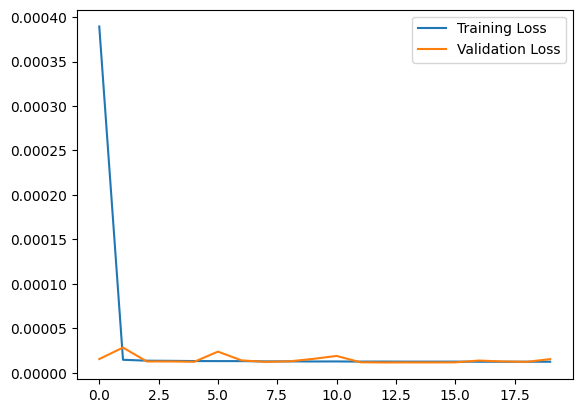

In [11]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

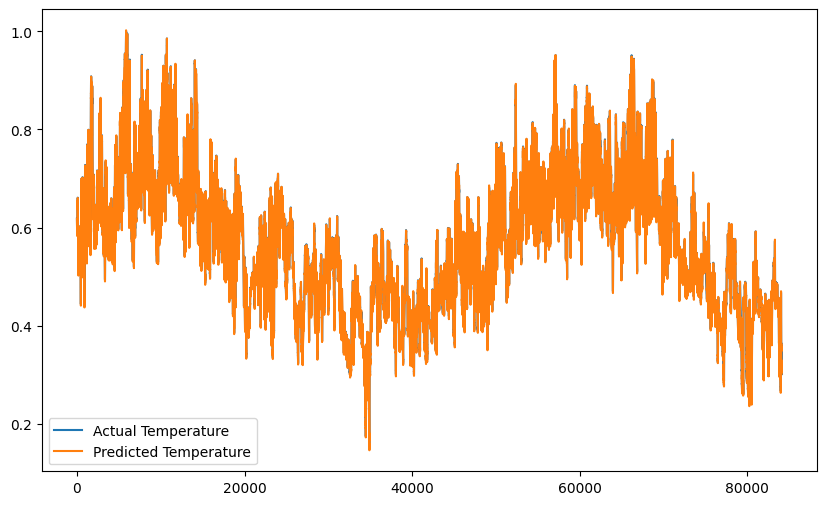

In [12]:
# Plot actual vs. predicted temperatures
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Temperature')
plt.plot(y_pred, label='Predicted Temperature')
plt.legend()
plt.show()